In [0]:
from fastai.vision import *
from fastai import *


Download into file
Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press CtrlShiftj on Windows/Linux and CmdOptj on macOS, and a small window the javascript 'Console' will appear. In Firefox press CtrlShiftk on Windows/Linux or CmdOptk on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));


In [0]:
folder1 = 'animals'
file1 = 'urls_animals.txt'
folder2 = 'humans'
file2 = 'urls_humans.txt'
folder3 = 'objects'
file3 = 'urls_objects.txt'

In [0]:
path = Path('/content')
dest1 = path/folder1
dest1.mkdir(parents=True, exist_ok=True)
dest2 = path/folder2
dest2.mkdir(parents=True, exist_ok=True)
dest3 = path/folder3
dest3.mkdir(parents=True, exist_ok=True)


In [52]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/animals'),
 PosixPath('/content/objects'),
 PosixPath('/content/humans'),
 PosixPath('/content/urls_objects.txt'),
 PosixPath('/content/cleaned.csv'),
 PosixPath('/content/urls_humans.txt'),
 PosixPath('/content/models'),
 PosixPath('/content/urls_animals.txt'),
 PosixPath('/content/export.pkl'),
 PosixPath('/content/home'),
 PosixPath('/content/sample_data')]

In [0]:
classes = ['animals','humans','objects']

In [54]:
download_images(path/file1, dest1, max_pics=300,max_workers=0)
download_images(path/file2, dest2, max_pics=300,max_workers=0)
download_images(path/file3, dest3, max_pics=300,max_workers=0)

In [55]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

animals


humans


objects


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [57]:
data.classes

['animals', 'humans', 'objects']

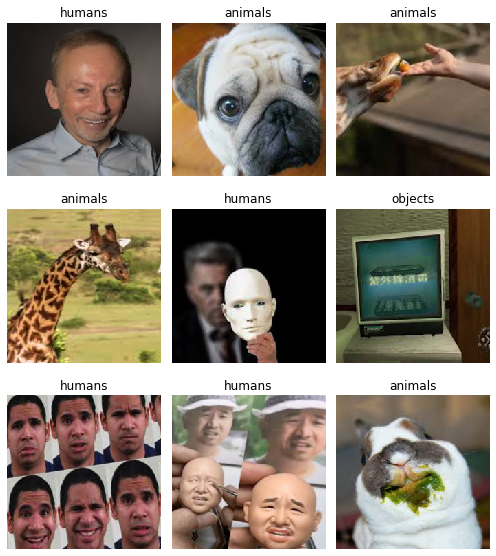

In [58]:
data.show_batch(rows=3, figsize=(7,8))


In [59]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['animals', 'humans', 'objects'], 3, 192, 48)

Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [61]:
epochs=5
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,error_rate,time
0,1.653867,1.300520,0.416667,00:02
1,1.068626,0.491674,0.145833,00:02
2,0.774083,0.336293,0.104167,00:02
3,0.605298,0.329884,0.104167,00:03
4,0.475431,0.334355,0.104167,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


In [64]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


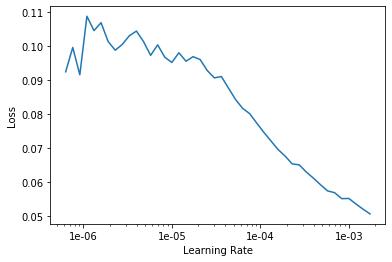

In [65]:
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(epochs, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.039370,0.413849,0.145833,00:03
1,0.034360,0.579717,0.145833,00:03
2,0.037289,0.493548,0.104167,00:03
3,0.036972,0.727298,0.145833,00:03
4,0.033761,0.684058,0.145833,00:03


In [0]:
learn.save('stage-2')


In [0]:

learn.load('stage-2');

In [69]:
interp = ClassificationInterpretation.from_learner(learn)


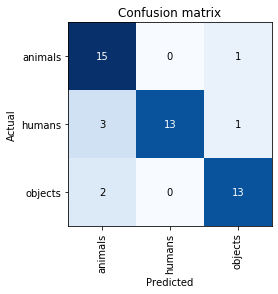

In [70]:
cm=interp.plot_confusion_matrix()


Cleaning


In [0]:
learn.export()
     

In [0]:
defaults.device = torch.device('cpu')


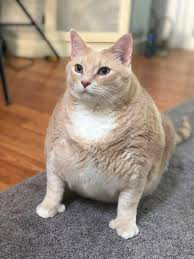

In [84]:
img1 = open_image(path/'animals'/'00000025.jpg')
img1

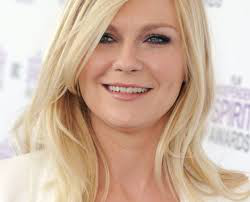

In [85]:
img2 = open_image(path/'humans'/'00000025.jpg')
img2

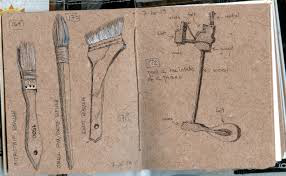

In [86]:
img3 = open_image(path/'objects'/'00000025.jpg')
img3

In [0]:
learn = load_learner(path)

In [92]:
pred_class1,pred_idx1,outputs1 = learn.predict(img1)
pred_class1

Category animals

In [89]:
pred_class2,pred_idx2,outputs2 = learn.predict(img2)
pred_class2

Category humans

In [90]:
pred_class3,pred_idx3,outputs3 = learn.predict(img3)
pred_class3

Category objects